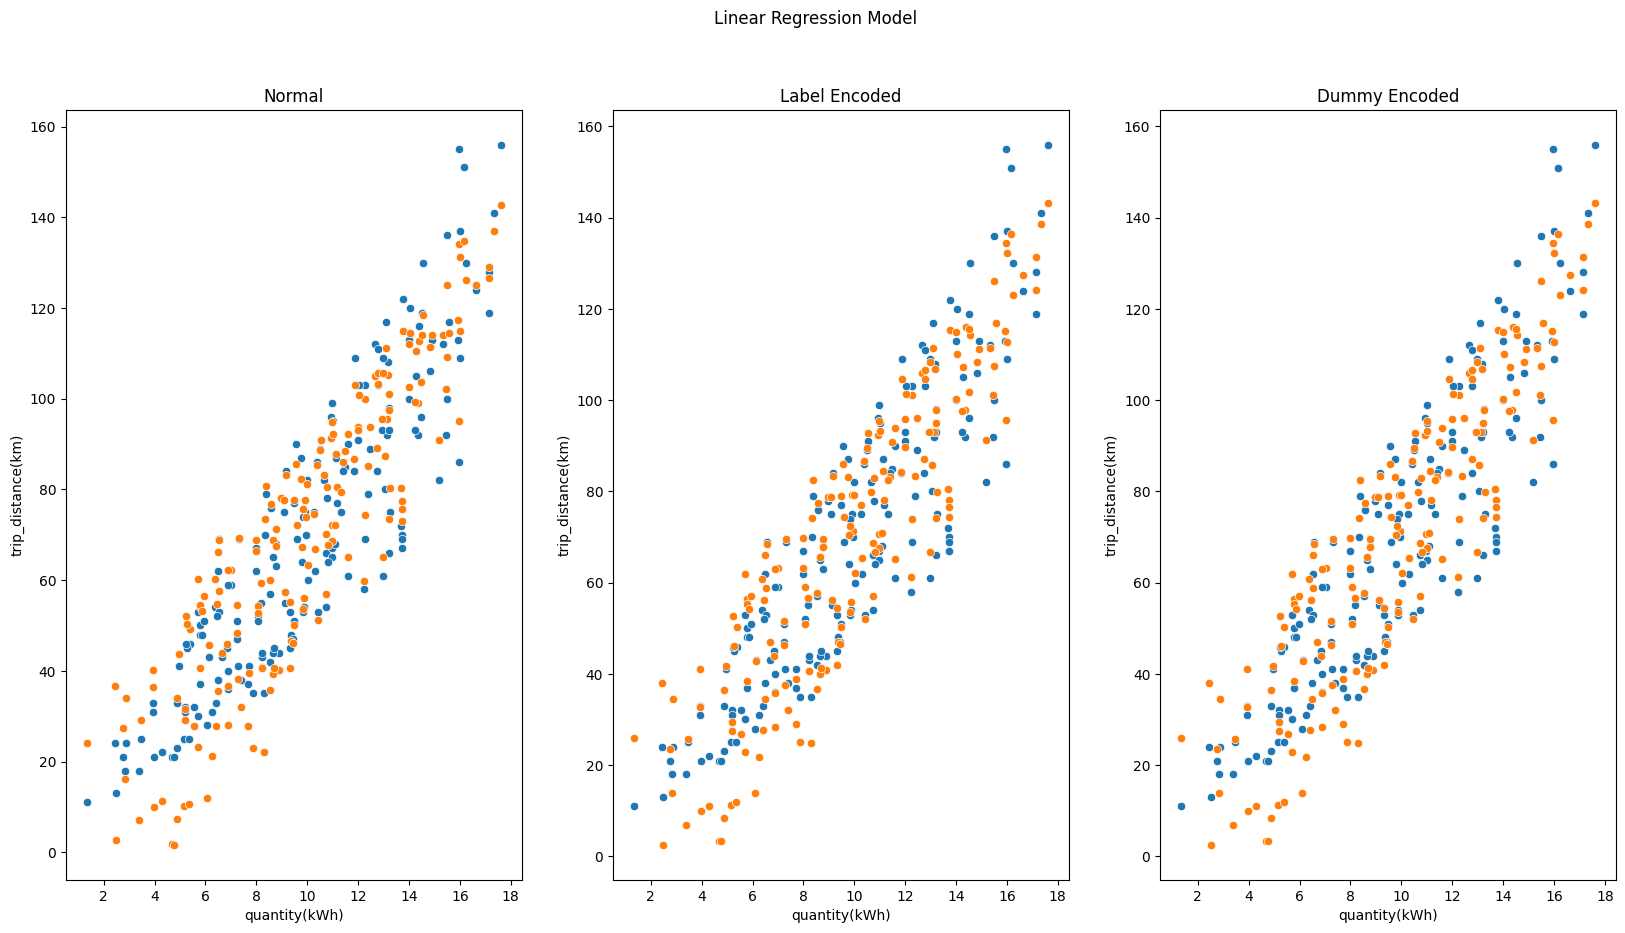

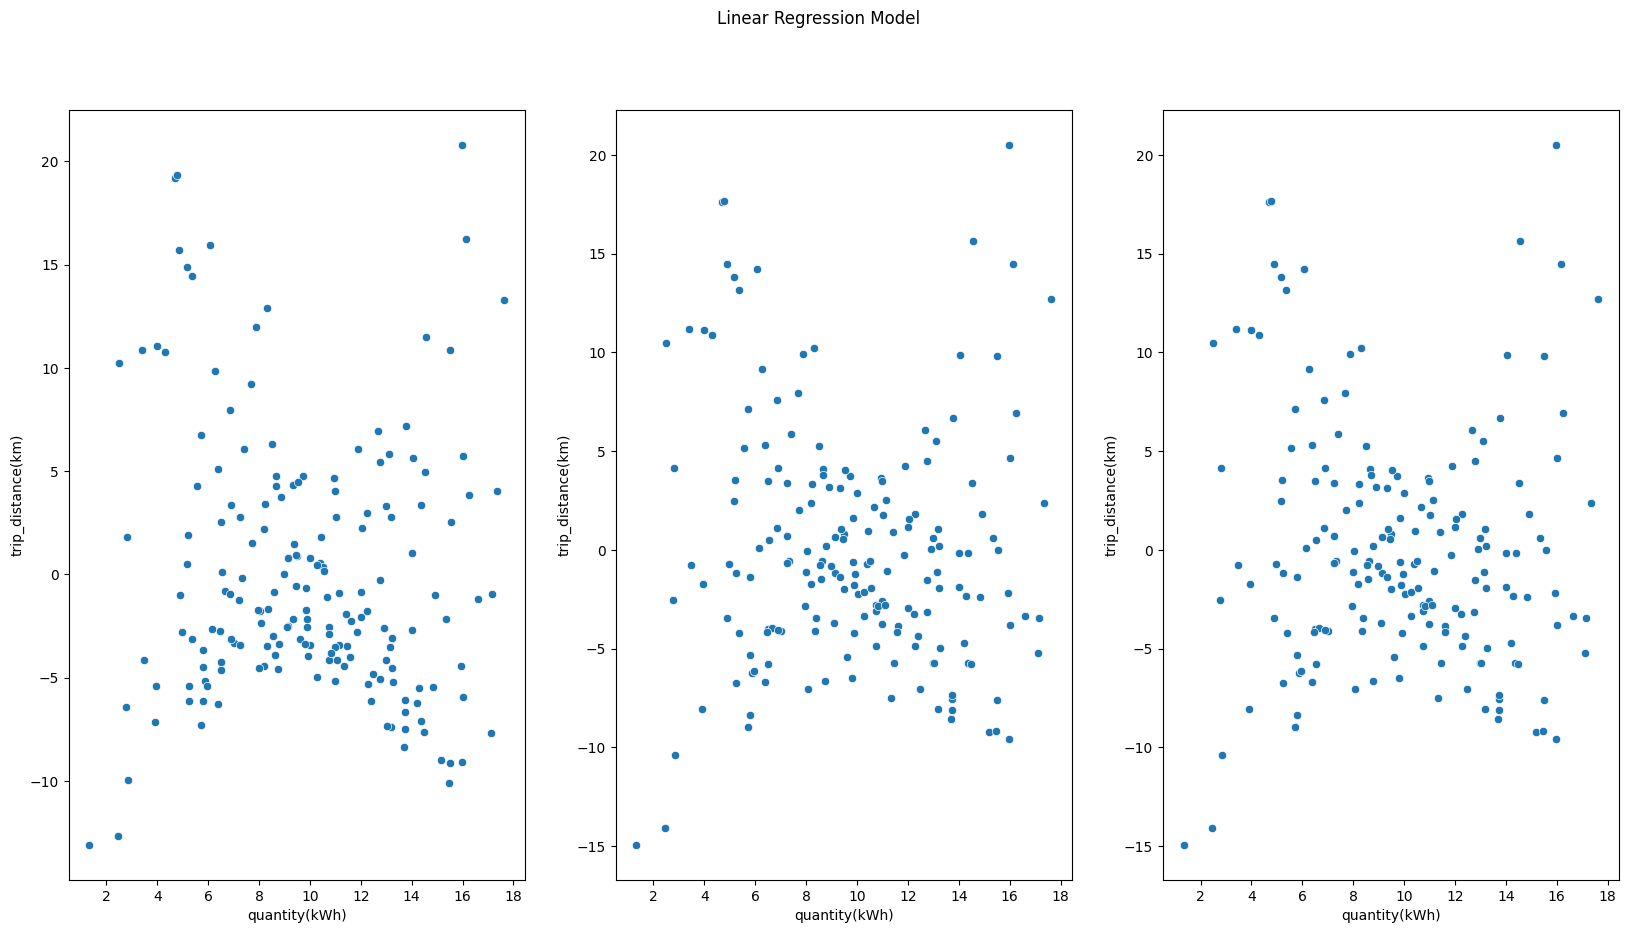

MSE for Normal Linear Regression: 39.79790810862924
MSE for Label Encoded Linear Regression: 37.5809939157928
MSE for Dummy Encoded Linear Regression: 37.58099391579275
LR Score: 0.9629372260260826


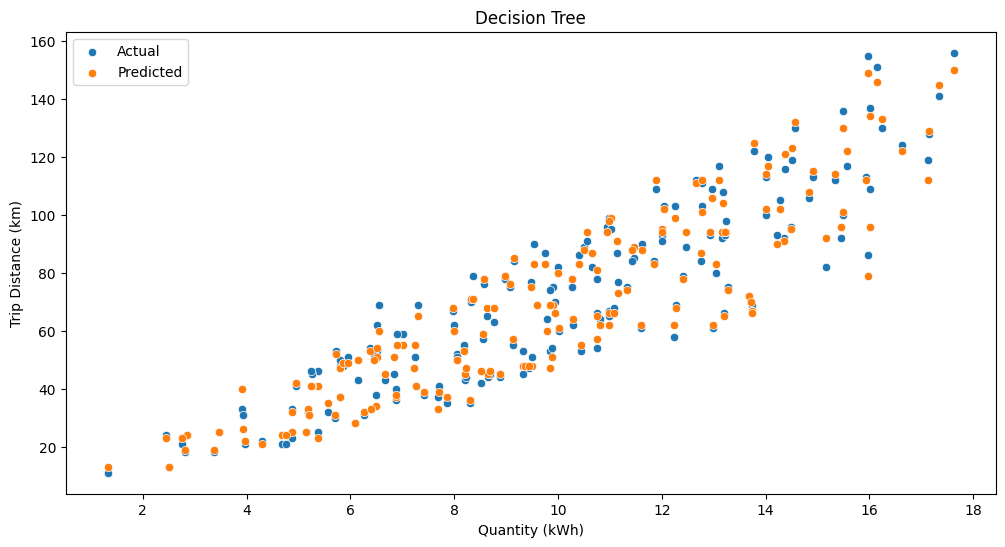

MSE for Decision Tree: 11.36111111111111
Score for Decision Tree: 0.9887955519711062

Predicted Values:
Linear Regression: [101.07514781 126.67489832  80.34093244  76.84347761 112.63799852
  99.10488887  93.8601495   57.4855594   62.33024194  74.29343822
  93.04650181  95.51217102 126.17410936  45.62913247  88.47532987
  77.55810544  54.1137337   77.47016287  27.7984385  114.82606409
  59.41168772  73.46132029 114.91709562  73.95337402  68.85943567
  80.41872664  31.50325797  92.2520175    2.77796828 105.05473769
  80.55603539  66.95663442  36.64486287  48.25197161  39.46483597
  70.16494508 111.17159998  68.89979946  82.22427879   7.30190295
  21.13931832  77.99484089  40.25012532 128.95246908  90.99241371
  95.08768211  33.93759891 111.42846378   1.81594864  83.22091413
  28.04240502  59.99544087 118.4894815  105.57126061 102.6829206
  39.25503441 100.01353322 114.38602994  93.81583418  59.7745559
  60.25870006  57.62641912  86.80170354 103.2792548   54.49706738
  99.24131841  91.343

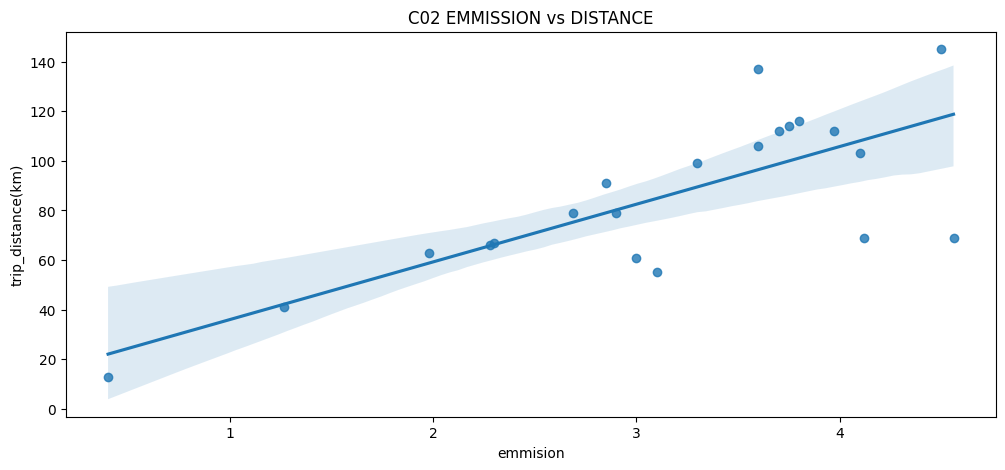

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/trial16.csv")

X = data.drop(['fuel_note','manufacturer', 'model', 'version', 'fuel_date', 'odometer',
               'trip_distance(km)', 'fuel_type','tire_type', 'driving_style'], axis=1)
Y = data['trip_distance(km)']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

data_enc_l = pd.read_csv("/content/trial16_2.csv")
X_enc_l = data_enc_l.drop(['fuel_note','manufacturer', 'model', 'version', 'fuel_date', 'odometer',
                            'trip_distance(km)', 'fuel_type','tire_type', 'driving_style'], axis=1)
Y_enc_l = data_enc_l['trip_distance(km)']

X_train_enc_l, X_test_enc_l, y_train_enc_l, y_test_enc_l = train_test_split(X_enc_l, Y_enc_l, random_state=1)
lr.fit(X_train_enc_l, y_train_enc_l)
y_pred_enc_l = lr.predict(X_test_enc_l)

data_enc_dum = pd.read_csv("/content/trial16_3.csv")
X_enc_dum = data_enc_dum.drop(['fuel_note','manufacturer', 'model', 'version', 'fuel_date', 'odometer',
                                'trip_distance(km)', 'fuel_type'], axis=1)
Y_enc_dum = data_enc_dum['trip_distance(km)']

X_train_enc_dum, X_test_enc_dum, y_train_enc_dum, y_test_enc_dum = train_test_split(X_enc_dum, Y_enc_dum, random_state=1)
lr.fit(X_train_enc_dum, y_train_enc_dum)
y_pred_enc_dum = lr.predict(X_test_enc_dum)

mse(y_test_enc_dum,y_pred_enc_dum)

lr.score(X_test_enc_dum,y_test_enc_dum)

mse_n = mse(y_test, y_pred)
mse_enc_l = mse(y_test_enc_l, y_pred_enc_l)
mse_enc_dum = mse(y_test_enc_dum, y_pred_enc_dum)

# Plotting
plt.figure(figsize=(20, 10))
plt.suptitle("Linear Regression Model")

plt.subplot(1, 3, 1)
plt.title("Normal")
sns.scatterplot(x=X_test['quantity(kWh)'], y=y_test)
sns.scatterplot(x=X_test['quantity(kWh)'], y=y_pred)

plt.subplot(1, 3, 2)
plt.title("Label Encoded")
sns.scatterplot(x=X_test_enc_l['quantity(kWh)'], y=y_test_enc_l)
sns.scatterplot(x=X_test_enc_l['quantity(kWh)'], y=y_pred_enc_l)

plt.subplot(1, 3, 3)
plt.title("Dummy Encoded")
sns.scatterplot(x=X_test_enc_dum['quantity(kWh)'], y=y_test_enc_dum)
sns.scatterplot(x=X_test_enc_dum['quantity(kWh)'], y=y_pred_enc_dum)

plt.show()

plt.figure(figsize=(20, 10))
plt.suptitle("Linear Regression Model")

plt.subplot(1, 3, 1)
sns.scatterplot(x=X_test['quantity(kWh)'], y=y_test-y_pred)

plt.subplot(1, 3, 2)
sns.scatterplot(x=X_test_enc_l['quantity(kWh)'], y=y_test_enc_l-y_pred_enc_l)

plt.subplot(1, 3, 3)
sns.scatterplot(x=X_test_enc_dum['quantity(kWh)'], y=y_test_enc_dum-y_pred_enc_dum)

plt.show()

# Print MSE for all models
print("MSE for Normal Linear Regression:", mse_n)
print("MSE for Label Encoded Linear Regression:", mse_enc_l)
print("MSE for Dummy Encoded Linear Regression:", mse_enc_dum)
print("LR Score:", lr.score(X_test_enc_dum,y_test_enc_dum))

# Decision Tree model
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Calculate MSE and Score for Decision Tree
mse_dt = mse(y_test, y_pred_dt)
score_dt = dt.score(X_test, y_test)

# Plot Decision Tree
plt.figure(figsize=(12, 6))
plt.title("Decision Tree")
sns.scatterplot(x=X_test['quantity(kWh)'], y=y_test)
sns.scatterplot(x=X_test['quantity(kWh)'], y=y_pred_dt)
plt.legend(["Actual", "Predicted"])
plt.xlabel("Quantity (kWh)")
plt.ylabel("Trip Distance (km)")
plt.show()

# Print MSE and Score for Decision Tree
print("MSE for Decision Tree:", mse_dt)
print("Score for Decision Tree:", score_dt)

# Display Predicted Values
print("\nPredicted Values:")
print("Linear Regression:", y_pred)
print("Decision Tree:", y_pred_dt)

data = pd.read_csv("/content/trial16_4.csv", encoding='ISO-8859-1')
plt.figure(figsize=(12, 5))
plt.title("C02 EMMISSION vs DISTANCE")
sns.regplot(x='emmision', y='trip_distance(km)', data=data)
plt.show()